In [1]:
import pandas as pd
import numpy as np

columns = ['id','nb_words_title','nb_words_content','pp_uniq_words','pp_stop_words','pp_uniq_non-stop_words',
            'nb_links','nb_outside_links','nb_images','nb_videos','ave_word_length','nb_keywords','category',
            'nb_mina_mink','nb_mina_maxk','nb_mina_avek','nb_maxa_mink','nb_maxa_maxk','nb_maxa_avek','nb_avea_mink',
            'nb_avea_maxk','nb_avea_avek','nb_min_linked','nb_max_linked','nb_ave_linked','weekday','dist_topic_0',
            'dist_topic_1','dist_topic_2','dist_topic_3','dist_topic_4','subj','polar','pp_pos_words','pp_neg_words',
            'pp_pos_words_in_nonneutral','ave_polar_pos','min_polar_pos','max_polar_pos','ave_polar_neg','min_polar_neg',
            'max_polar_neg','subj_title','polar_title'
          ]

train_data = pd.read_csv('train.csv', delimiter =' ', names = columns)
train_data_target = pd.read_csv('train-targets.csv')


test_set = pd.read_csv('test-val.csv', delimiter = ' ')


In [50]:
L = [1,2,3]

L[1:]

[2, 3]

In [58]:
from sklearn import preprocessing as pre

util_train_data = pre.scale(train_data.drop('id', axis=1))

util_train_data = pd.DataFrame(util_train_data, columns = columns[1:])

util_train_data.head()

#util_train_data['id'] = train_data['id']

,nb_words_title,nb_words_content,pp_uniq_words,pp_stop_words,pp_uniq_non-stop_words,nb_links,nb_outside_links,nb_images,nb_videos,ave_word_length,...,pp_neg_words,pp_pos_words_in_nonneutral,ave_polar_pos,min_polar_pos,max_polar_pos,ave_polar_neg,min_polar_neg,max_polar_neg,subj_title,polar_title
0,-0.655717,0.602013,0.040637,-0.176467,0.483878,0.401012,0.058959,0.833332,-0.059255,0.001274,...,0.255940,0.157739,0.858419,-0.845050,0.982772,-0.490327,-0.982572,0.607299,-0.892007,-0.276578
1,-0.655717,0.520422,-0.811674,-0.176467,-0.677941,-0.253228,-0.043117,-0.423503,-0.312267,0.001274,...,0.863708,-0.781709,-0.439878,-0.612798,0.172965,-0.733670,-0.687342,0.048126,1.889990,0.876968
2,-1.130874,-0.896681,1.680713,-0.176467,1.150484,-0.346691,-0.451423,-0.549187,0.193756,0.001274,...,-0.842451,0.780895,0.126930,0.590956,-1.041745,0.441284,1.084383,-1.070220,-0.892007,-0.276578
3,0.769755,-0.776442,0.774857,-0.176467,0.928064,-0.346691,-0.553500,-0.549187,-0.312267,0.001274,...,0.987513,0.275562,0.172888,0.590956,-0.636842,-1.164942,0.395398,-3.306912,-0.892007,-0.276578
4,1.244912,0.237002,-0.508744,-0.176467,-0.509817,-0.253228,-0.043117,-0.423503,-0.312267,0.001274,...,0.463219,-0.637178,-0.038708,-0.612798,-0.636842,0.091930,-0.982572,0.048126,-0.892007,-0.276578


In [3]:
import random
from sklearn.model_selection import train_test_split

train_data,test_set,target_train,target_test = train_test_split(train_data,train_data_target['Prediction'],random_state = 0)


In [5]:
import sklearn
from sklearn import svm
from sklearn.model_selection import cross_val_score

def compute_score(clf,X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return(np.mean(xval))

In [6]:
clf = svm.LinearSVC()


clf.fit(train_data,target_train)
scores = cross_val_score(clf, test_set, target_test, cv=10)
# L'analyse lineaire est terrible


C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [9]:
scores

array([ 0.00171821,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


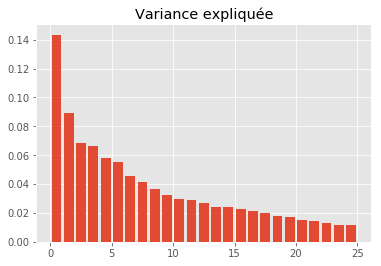

In [65]:
from sklearn.decomposition import PCA

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

pca = PCA(n_components = 25)
print(pca.fit(util_train_data))
pca.explained_variance_ratio_

plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")



In [ ]:
#Test avec xgboost

In [66]:
print(sum(pca.explained_variance_ratio_))

0.935065760494
